In [27]:
import hardsales_utils as hs
from typing import Optional, List
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt



In [28]:
hard_sales_df = hs.load_hard_sales()
hard_sales_df = hs.extract_by_hw(hard_sales_df, ['NSW', 'NS2', 'PS5'])

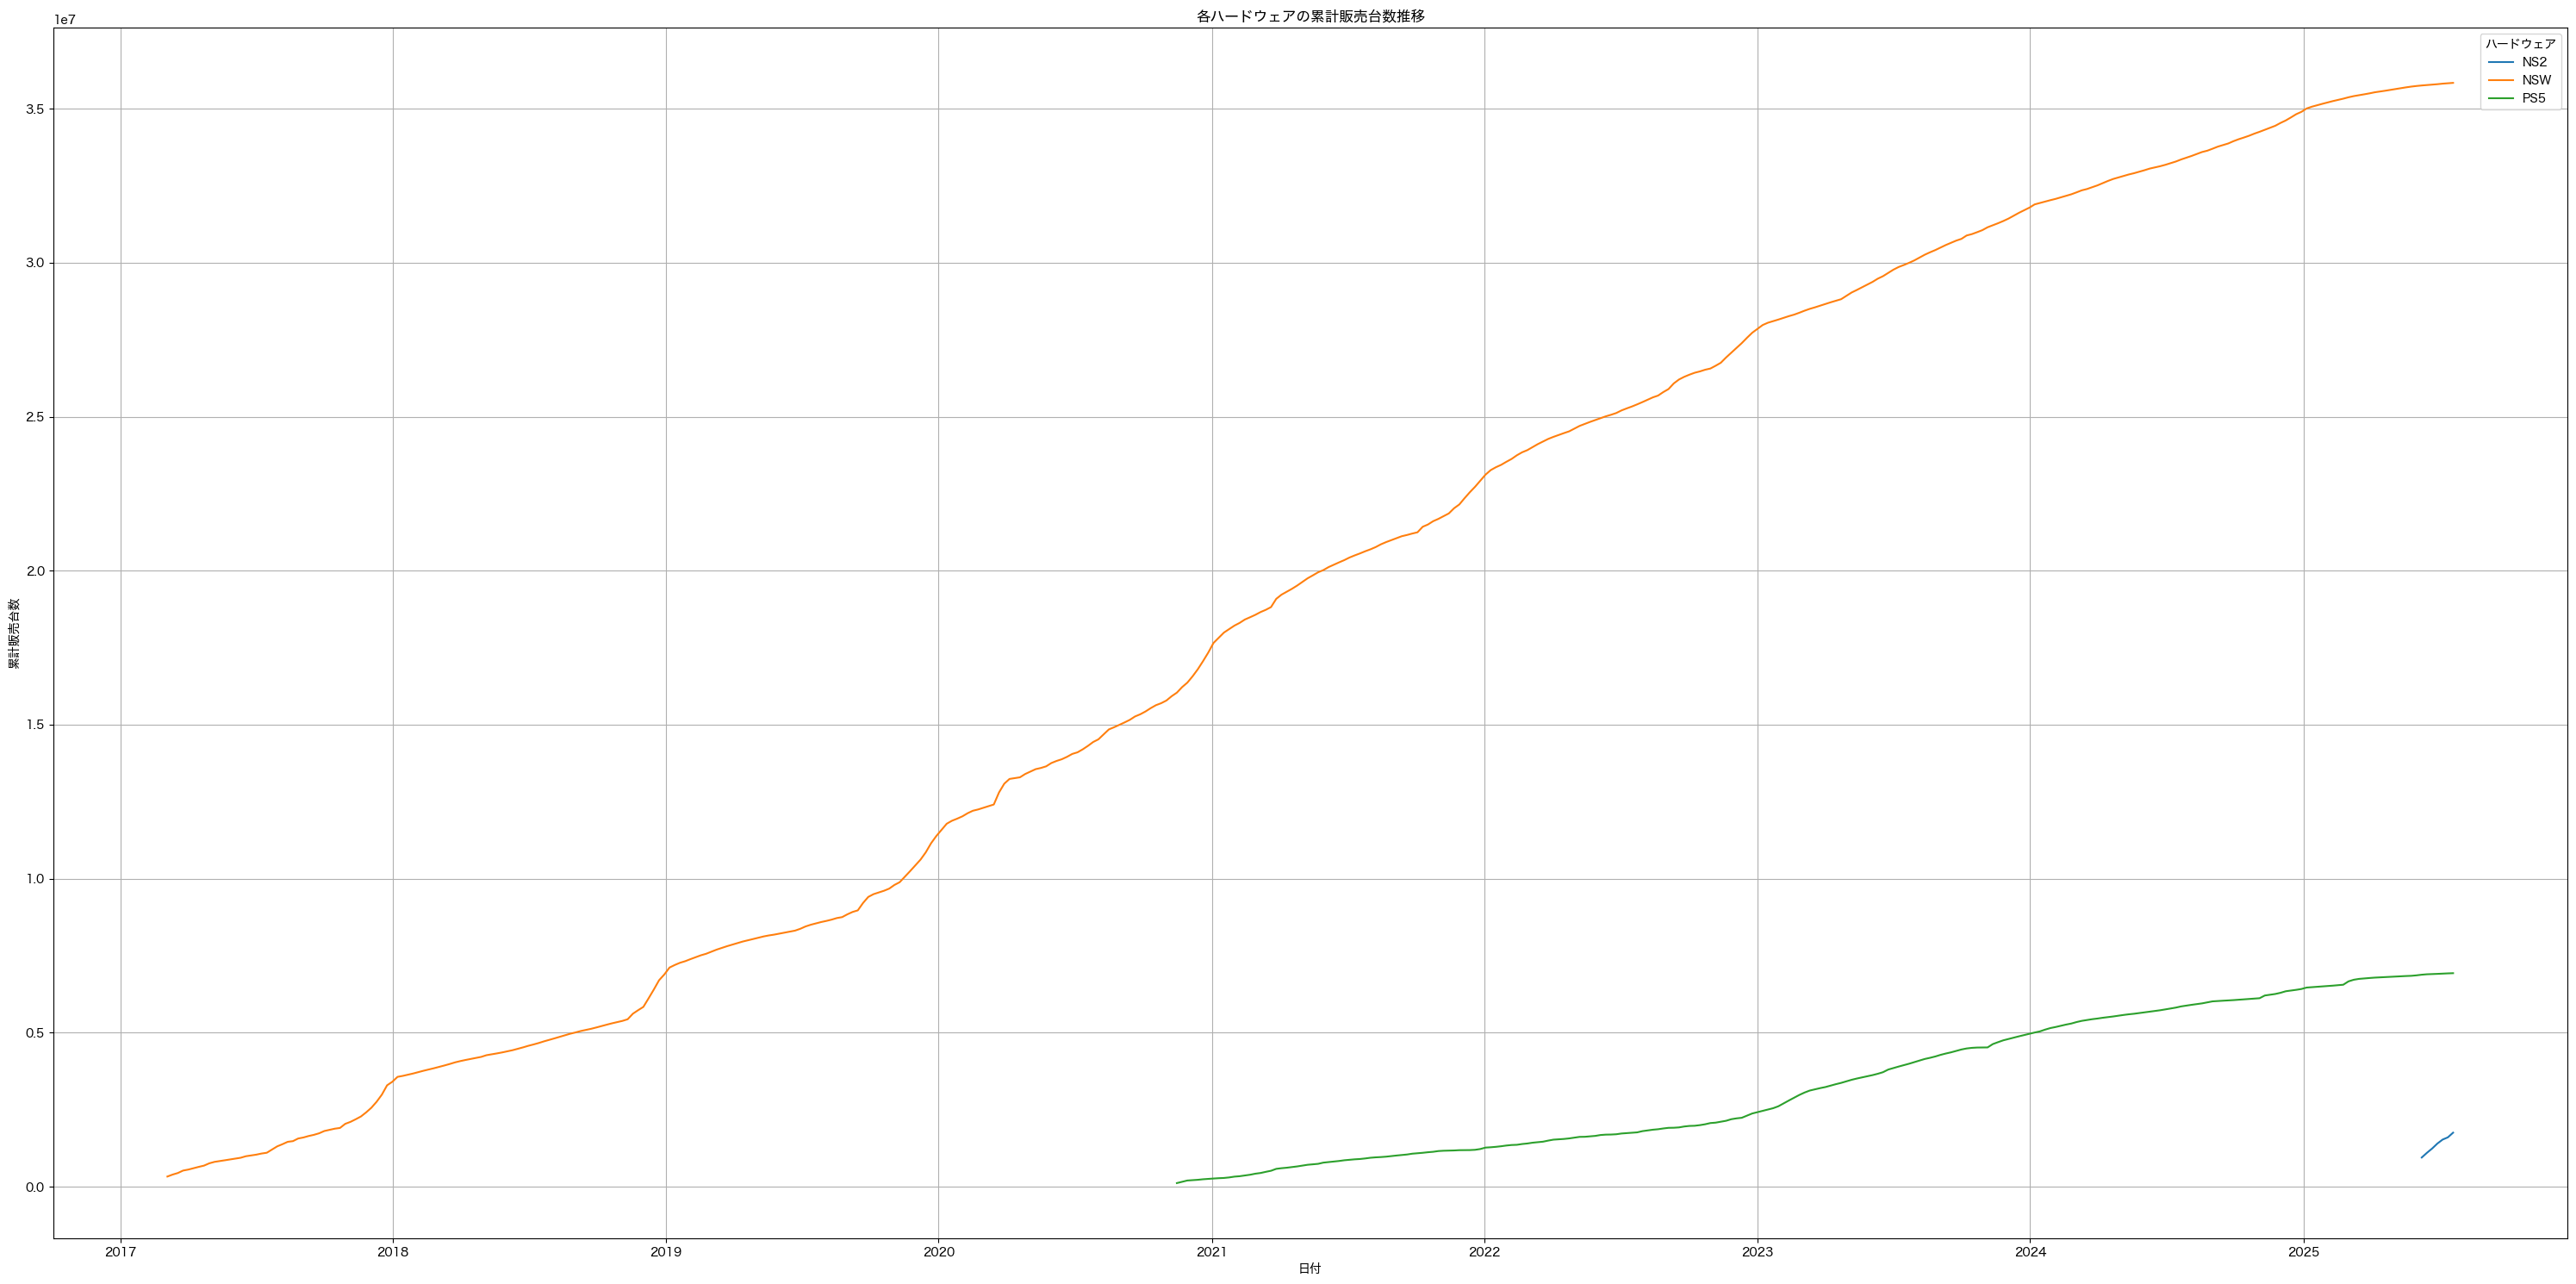

In [29]:


# 1. 必要なカラムだけ抽出（時系列・ハード・累計台数）
plot_df = hard_sales_df[['report_date', 'hw', 'sum_units']].copy()

# 2. 日付でソート（念のため）
plot_df = plot_df.sort_values(['hw', 'report_date'])

# 3. ピボットテーブル化（横:日付, 縦:ハード, 値:累計台数）
pivot_df = plot_df.pivot(index='report_date', columns='hw', values='sum_units')

# 4. グラフ描画
plt.figure(figsize=(30, 15))
plt.rcParams['font.family'] = 'Hiragino Sans'  # または 'Hiragino Sans', 'Osaka' など
plt.rcParams['axes.unicode_minus'] = False   # マイナス記号の文字化け防止

pivot_df.plot(ax=plt.gca(), kind='line')
plt.title('各ハードウェアの累計販売台数推移')
plt.xlabel('日付')
plt.ylabel('累計販売台数')
plt.legend(title='ハードウェア')
plt.gca().set_ylabel('累計販売台数')
plt.grid(True)
plt.tight_layout()
plt.show()

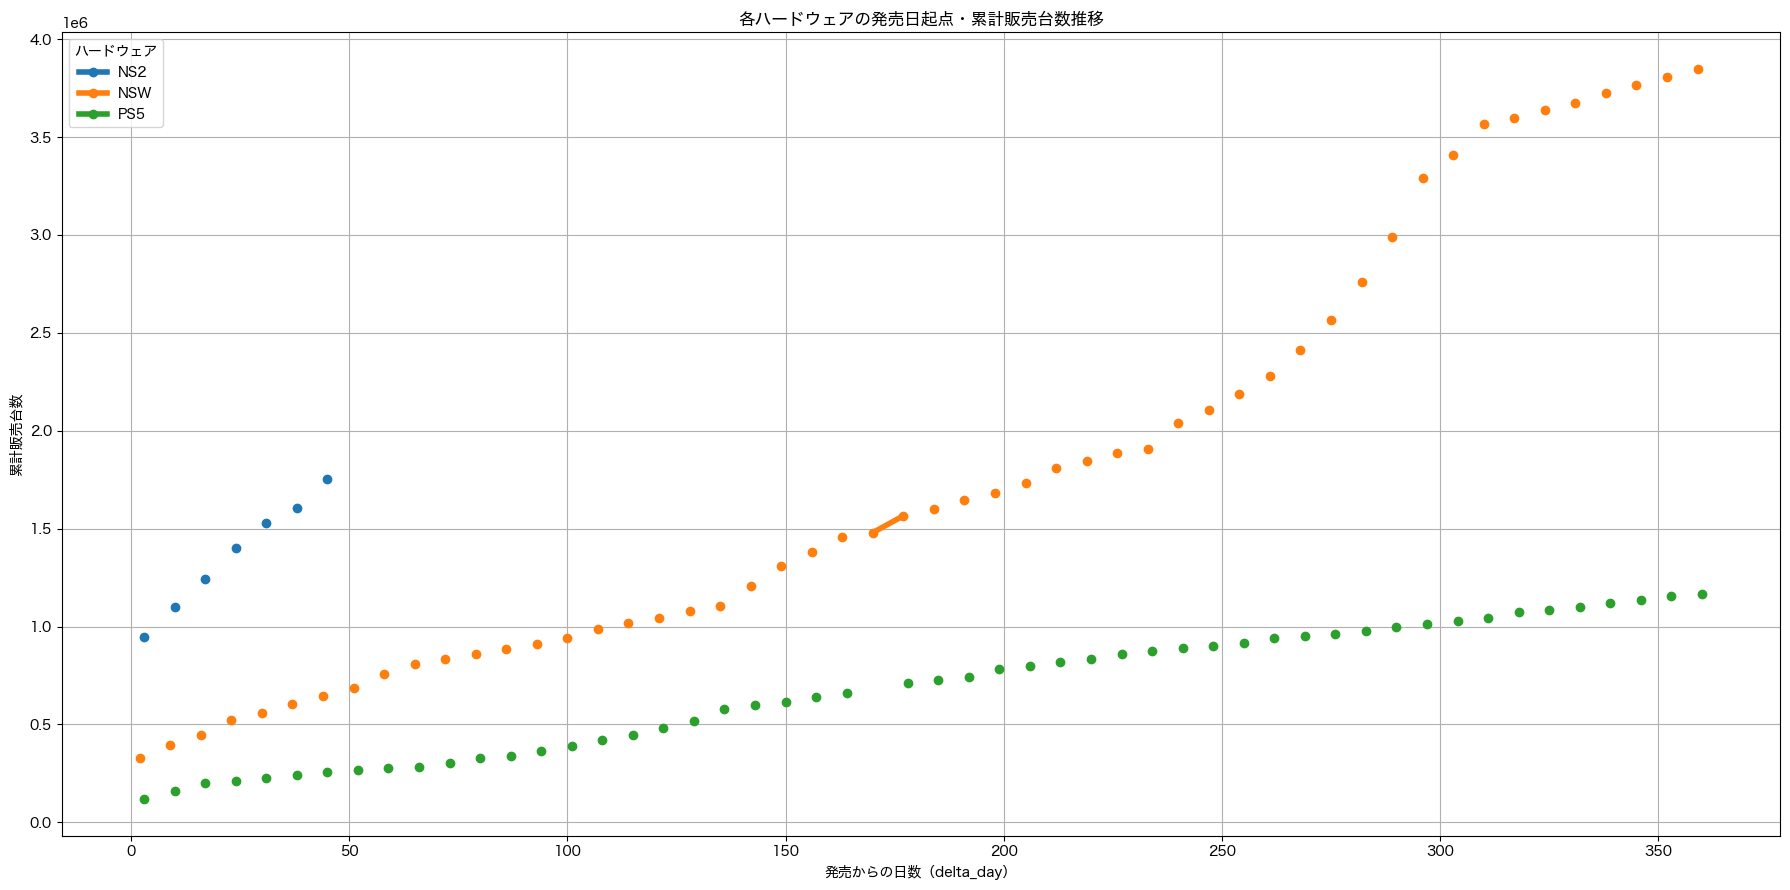

In [31]:
# 1. 必要なカラムだけ抽出（delta_dayを使用）
plot_df = hard_sales_df[['hw', 'delta_day', 'sum_units']].copy()
plot_df = plot_df[plot_df['delta_day'] <= 365]  # 1年以内のデータに絞る

# 2. delta_day・ハードごとに累計台数をピボット
pivot_df = plot_df.pivot(index='delta_day', columns='hw', values='sum_units')

# 3. グラフ描画
plt.figure(figsize=(18, 9))
plt.rcParams['font.family'] = 'Hiragino Sans'
plt.rcParams['axes.unicode_minus'] = False

# 折れ線グラフ（線のみ、マーカーなし、線を太く）
pivot_df.plot(
    ax=plt.gca(),
    kind='line',
    linestyle='-',
    marker='o',
    linewidth=4  # 線を太くしたい場合
)

plt.title('各ハードウェアの発売日起点・累計販売台数推移')
plt.xlabel('発売からの日数（delta_day）')
plt.ylabel('累計販売台数')
plt.legend(title='ハードウェア')
plt.grid(True)
plt.tight_layout()
plt.show()